In [9]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2024-05-01 14:13:20--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.54.44, 13.224.54.125, 13.224.54.121, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.54.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.03s   

2024-05-01 14:13:21 (1.74 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [34]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


In [35]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [36]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [37]:
def naive_with_rc(p, t):
    rev_p = reverseComplement(p)
    occurrences = []
    for i in range(len(t) - len(p) + 1):  
        match = True
        rc_match = True
        for j in range(len(p)):  
            
            if t[i+j] != p[j]:
                match = False
                
            if t[i+j] != rev_p[j]:  
                rc_match = False
                
        if match:
            occurrences.append(i)
        if rc_match and rev_p != p:
            occurrences.append(i)
            
    return occurrences

In [38]:
genome = readGenome('lambda_virus.fa')

In [42]:
occ = naive_with_rc('AGTCGA', genome)
print(len(occ))
occ

9


[450, 1908, 2472, 18005, 23320, 33657, 41927, 44806, 45369]

In [12]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        mm = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mm += 1

        if mm < 3:
            occurrences.append(i)
            mm = 0
        else:
            mm = 0

    return occurrences

In [44]:
occ = naive_2mm('AGGAGGTT', genome)
print(len(occ))
occ

215


[49,
 282,
 299,
 302,
 380,
 1560,
 1650,
 2235,
 2277,
 2400,
 2562,
 2565,
 2729,
 2823,
 3160,
 3181,
 3946,
 4210,
 4294,
 4309,
 4405,
 4580,
 5069,
 5159,
 5189,
 5231,
 5331,
 5519,
 5737,
 5882,
 5993,
 5996,
 6011,
 6312,
 6522,
 6585,
 6606,
 7316,
 7394,
 7819,
 7904,
 7966,
 7998,
 8534,
 8648,
 8946,
 9339,
 9354,
 9530,
 9842,
 9966,
 10041,
 10250,
 10416,
 10445,
 10484,
 10527,
 10874,
 11193,
 11292,
 11505,
 11568,
 11655,
 11745,
 11838,
 12078,
 12180,
 12222,
 12697,
 12745,
 12819,
 12880,
 12935,
 13011,
 13087,
 13256,
 13415,
 13526,
 13813,
 14259,
 15385,
 15473,
 16192,
 17101,
 17437,
 17755,
 17936,
 17989,
 18016,
 18040,
 18727,
 18853,
 18911,
 19232,
 19263,
 19310,
 19833,
 19929,
 19932,
 19947,
 19980,
 20793,
 20802,
 21305,
 21528,
 21627,
 21684,
 22414,
 22660,
 22670,
 22787,
 23326,
 24063,
 24145,
 24409,
 24595,
 24681,
 25120,
 25139,
 25210,
 25381,
 25384,
 25648,
 25664,
 25773,
 25987,
 26196,
 26208,
 26576,
 26587,
 26653,
 26736,
 

In [28]:
!wget --no-check  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2024-05-01 14:23:32--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.54.125, 13.224.54.121, 13.224.54.140, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.54.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.1s    

2024-05-01 14:23:33 (2.14 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [45]:
seq, qual = readFastq('ERR037900_1.first1000.fastq')

In [46]:
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100

    for read in reads:
        for i in range(len(read)):
            if read[i] == 'G' or read[i] == 'C':
                gc[i] += 1
            totals[i] += 1
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])

    return gc

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

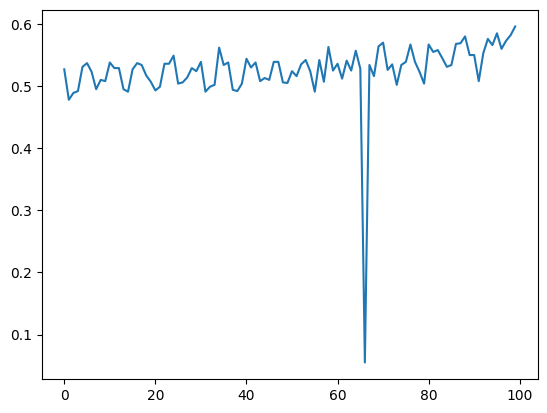

In [48]:
gc = findGCByPos(seq)
plt.plot(range(len(gc)), gc)
plt.show()

In [49]:
min(list(enumerate(gc)), key=lambda kv: kv[1])

(66, 0.055)